<a href="https://colab.research.google.com/github/schauppi/Cats_vs_Dogs_Classifier/blob/schauppi/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import time
import matplotlib.pyplot as plt
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
#define path to train directory
train_dir = "/content/drive/MyDrive/Excercise_cats_v_dogs_full/dogs-vs-cats/train"
test_dir = "/content/drive/MyDrive/Excercise_cats_v_dogs_full/dogs-vs-cats/test"
main_dir = "/content/drive/MyDrive/Excercise_cats_v_dogs_full/dogs-vs-cats"

In [4]:
#create train directories - check if directories exists
cats = "cats"
dogs = "dogs"
cats_train_dir = os.path.join(train_dir, cats)
dogs_train_dir = os.path.join(train_dir, dogs)

if os.path.isdir(os.path.join(train_dir, cats)) == True or os.path.isdir(os.path.join(train_dir, dogs)) == True:
  print("Directories already existing")
else:
  os.mkdir(cats_train_dir)
  os.mkdir(dogs_train_dir)
  print("Created directories")

Directories already existing


In [5]:
#create test directories - check if directories exists
test = "test"
full_test_dir = os.path.join(main_dir, test)
cats_test_dir = os.path.join(full_test_dir, cats)
dogs_test_dir = os.path.join(full_test_dir, dogs)

if os.path.isdir(os.path.join(main_dir, test)) == True:
  print("Directories already existing")
else:
  test = "test"
  os.mkdir(os.path.join(main_dir, test))
 
  os.mkdir(cats_test_dir)
  os.mkdir(dogs_test_dir)

Directories already existing


In [6]:
#split the cat and dog images to the train directory
data = os.listdir(train_dir)

#if filename starts with cat or dog - move to directorie
for i in range(len(data)):
  filename = data[i]
  split = filename.split(".")
  if split[0] == "cat":
    shutil.move(os.path.join(train_dir, filename), os.path.join(cats_dir, filename))
  elif split[0] == "dog":
    shutil.move(os.path.join(train_dir, filename), os.path.join(dogs_dir, filename))
  else:
    pass

In [7]:
#split the cat and dog images in the train directory to the test and train directory
cats_data = os.listdir(cats_train_dir)
dogs_data = os.listdir(dogs_train_dir)

#if split is already done
if len(cats_data) != 10000:

  #define the splitsize
  split_size = int(0.8 * len(cats_data))

  #shuffle data
  random.shuffle(cats_data)
  random.shuffle(dogs_data)

  test_data_cats = []
  test_data_dogs = []

  test_data_cats = cats_data[split_size:]
  test_data_dogs = dogs_data[split_size:]

  for i in range(len(test_data_cats)):
    filename = test_data_cats[i]
    shutil.move(os.path.join(cats_train_dir, filename), os.path.join(cats_test_dir, filename))

  for i in range(len(test_data_dogs)):
    filename = test_data_dogs[i]
    shutil.move(os.path.join(dogs_train_dir, filename), os.path.join(dogs_test_dir, filename))

else:
  print("data already splitted")

data already splitted


In [8]:
#check if files in folder
len_cat_train = os.listdir(cats_train_dir)
print(len(len_cat_train))

len_dog_train = os.listdir(dogs_train_dir)
print(len(len_dog_train))

len_cat_test = os.listdir(cats_test_dir)
print(len(len_cat_test))

len_dog_test = os.listdir(dogs_test_dir)
print(len(len_dog_test))


10000
10000
2500
2500


In [9]:
#define the data generator

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), class_mode="binary", batch_size=64)
validation_generator = val_datagen.flow_from_directory(test_dir, target_size=(150,150), class_mode="binary", batch_size=64)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=[150,150,3]),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [12]:
model.compile(metrics=["accuracy"], loss="binary_crossentropy", optimizer="adam")

In [13]:
#define an callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("accuracy") > 0.95:
      print("Reached 95% Acc - stop training")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
#define tensorboard callbac
logdir = "/content/drive/MyDrive/Cats_vs_Dogs_Classifier/my_logs"

def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_callback = tf.keras.callbacks.TensorBoard(run_logdir)

In [15]:
#%tensorboard --logdir "/content/drive/MyDrive/Cats_vs_Dogs_Classifier/my_logs"

In [16]:
history = model.fit(train_generator, steps_per_epoch=(len(train_generator)), epochs=25, validation_data = validation_generator, validation_steps=len(validation_generator), callbacks=[callbacks, tensorboard_callback])

Epoch 1/25
313/313 [==============================] - 3611s 12s/step - loss: 0.7194 - accuracy: 0.5200 - val_loss: 0.6521 - val_accuracy: 0.6042
Epoch 2/25
313/313 [==============================] - 175s 559ms/step - loss: 0.6495 - accuracy: 0.6051 - val_loss: 0.5884 - val_accuracy: 0.6814
Epoch 3/25
313/313 [==============================] - 172s 550ms/step - loss: 0.6081 - accuracy: 0.6610 - val_loss: 0.5431 - val_accuracy: 0.7254
Epoch 4/25
313/313 [==============================] - 172s 549ms/step - loss: 0.5721 - accuracy: 0.7010 - val_loss: 0.4954 - val_accuracy: 0.7626
Epoch 5/25
313/313 [==============================] - 171s 545ms/step - loss: 0.5539 - accuracy: 0.7151 - val_loss: 0.5037 - val_accuracy: 0.7544
Epoch 6/25
313/313 [==============================] - 172s 549ms/step - loss: 0.5334 - accuracy: 0.7322 - val_loss: 0.4489 - val_accuracy: 0.7966
Epoch 7/25
313/313 [==============================] - 171s 546ms/step - loss: 0.5143 - accuracy: 0.7472 - val_loss: 0.4285 - 

In [17]:
"""function ClickConnect(){
    console.log("Clicked on connect button"); 
    document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)"""


'function ClickConnect(){\n    console.log("Clicked on connect button"); \n    document.querySelector("colab-connect-button").click()\n}\nsetInterval(ClickConnect,60000)'

In [21]:
#save model
model.save("/content/drive/MyDrive/Excercise_cats_v_dogs_full/cats_vs_dogs.h5")

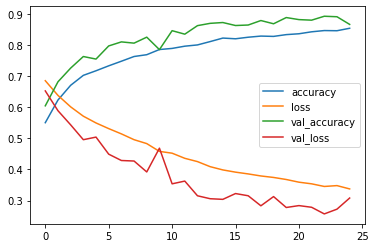

In [23]:
#Plot training data
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
plt.plot(accuracy, label="accuracy")
plt.plot(loss, label="loss")
plt.plot(val_accuracy, label="val_accuracy")
plt.plot(val_loss, label="val_loss")
plt.legend()